In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Mall_Customers.csv'
data = pd.read_csv(file_path)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [8]:
data['Gender'] = data['Gender'].map({'Male': 0, "Female": 1})

In [21]:
X = data[[ 'Annual Income (k$)', 'Spending Score (1-100)']].values

In [22]:
scaler = StandardScaler()

x_norm = scaler.fit_transform(X)


In [24]:
kmeans = KMeans(n_clusters= 5, random_state=42)
kmeans.fit(x_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [25]:
data['labels'] = kmeans.labels_

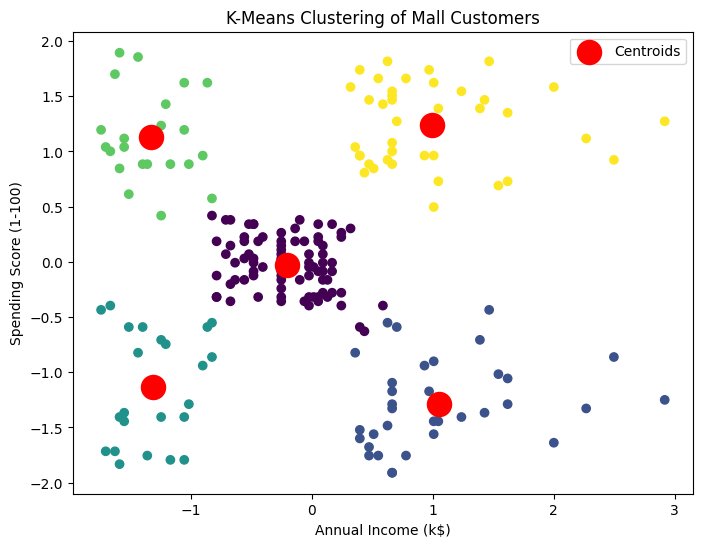

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(x_norm[:, 0], x_norm[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()